Iteration 1
  Gradient: [ 1. -1.]
  Search direction: [-1.  1.]
  Optimal alpha: 1.0
  New x: [-1.  1.]
------
Iteration 2
  Gradient: [-1. -1.]
  Search direction: [1. 1.]
  Optimal alpha: 0.20000000000179846
  New x: [-0.8  1.2]
------
Iteration 3
  Gradient: [ 0.2 -0.2]
  Search direction: [-0.2  0.2]
  Optimal alpha: 0.99999998519
  New x: [-1.   1.4]
------
Iteration 4
  Gradient: [-0.19999999 -0.2       ]
  Search direction: [0.19999999 0.2       ]
  Optimal alpha: 0.1999999788061522
  New x: [-0.96        1.43999999]
------
Iteration 5
  Gradient: [ 0.03999998 -0.04000002]
  Search direction: [-0.03999998  0.04000002]
  Optimal alpha: 1.000000948537682
  New x: [-1.00000002  1.48000005]
------
Iteration 6
  Gradient: [-0.03999996 -0.03999993]
  Search direction: [0.03999996 0.03999993]
  Optimal alpha: 0.19999996771668674
  New x: [-0.99200002  1.48800004]
------
Iteration 7
  Gradient: [ 0.00799997 -0.00799998]
  Search direction: [-0.00799997  0.00799998]
  Optimal alpha: 0.99

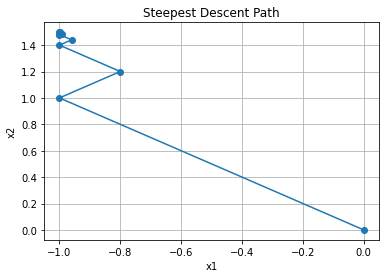

Optimal solution: [-0.9984  1.4976]
Optimal value: -1.2499968000081907


In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

def compute_steepest_descent(f, x0, tol=0.01, max_iter=1000):
    x = np.array(x0, dtype=float)  
    x_history = [x.copy()]
    for i in range(1, max_iter + 1):
        grad_val = gradient(f, x)
        if np.linalg.norm(grad_val) < tol:
            print("Gradient norm below tolerance. Optimization complete.")
            break
        
        search_direction = -grad_val

        # Line search for optimal alpha
        def f_alpha(alpha): 
            return f(x + alpha * search_direction)
        
        alpha_opt = minimize_scalar(f_alpha).x
        x = x + alpha_opt * search_direction

        print(f"Iteration {i}")
        print(f"  Gradient: {grad_val}")
        print(f"  Search direction: {search_direction}")
        print(f"  Optimal alpha: {alpha_opt}")
        print(f"  New x: {x}")
        print("------")

        x_history.append(x.copy())

    else:
        print("Maximum number of iterations reached.")

    return x, f(x), x_history

def f(x):
    return x[0] - x[1] + 2*x[0]**2 + 2*x[0]*x[1] + x[1]**2

def gradient(f, x, eps=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += eps
        x2[i] -= eps
        grad[i] = (f(x1) - f(x2)) / (2 * eps)
    return grad

def plot_steepest_descent(x_history):
    x_vals = np.array(x_history)
    plt.plot(x_vals[:, 0], x_vals[:, 1], marker='o')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Steepest Descent Path')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    x0 = [0, 0]
    x_opt, f_opt, x_history = compute_steepest_descent(f, x0)
    plot_steepest_descent(x_history)
    print("Optimal solution:", x_opt)
    print("Optimal value:", f_opt)


=== Steepest Descent Optimizer ===


Enter the function to minimize (in terms of x1 and x2):
 10*x1**2 + 5*x1*x2 + 10*(x2 - 3)**2
Enter initial value for x1:  10
Enter initial value for x2:  15
Enter tolerance (e.g., 0.01):  0.01
Enter maximum number of iterations:  100


Iteration 1
  Gradient: [275. 290.]
  Search direction: [-275. -290.]
  Optimal alpha: 0.04001127254509019
  New x: [-1.00309995  3.39673096]
------
Iteration 2
  Gradient: [-3.07834419  2.91911949]
  Search direction: [ 3.07834419 -2.91911949]
  Optimal alpha: 0.06663537548846162
  New x: [-0.79797333  3.20221434]
------
Iteration 3
  Gradient: [0.05160511 0.05442013]
  Search direction: [-0.05160511 -0.05442013]
  Optimal alpha: 0.04001127403548942
  New x: [-0.80003812  3.20003692]
------
Gradient norm below tolerance. Optimization complete.


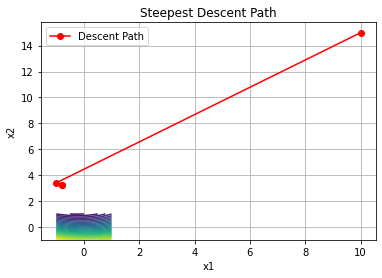


Optimal solution: [-0.80003812  3.20003692]
Optimal value: -5.999999978877435


In [4]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# Step 1: Convert user input string to function and gradient
def parse_function(user_input):
    x1, x2 = sp.symbols('x1 x2')
    expr = sp.sympify(user_input)
    f_lambdified = sp.lambdify((x1, x2), expr, modules='numpy')
    grad = [sp.diff(expr, var) for var in (x1, x2)]
    grad_lambdified = sp.lambdify((x1, x2), grad, modules='numpy')
    return f_lambdified, grad_lambdified

# Step 2: Steepest Descent using symbolic gradient
def compute_steepest_descent(f, grad_f, x0, tol=0.01, max_iter=1000):
    x = np.array(x0, dtype=float)
    x_history = [x.copy()]
    
    for i in range(1, max_iter + 1):
        grad_val = np.array(grad_f(x[0], x[1]), dtype=float)
        if np.linalg.norm(grad_val) < tol:
            print("Gradient norm below tolerance. Optimization complete.")
            break

        search_direction = -grad_val

        # Line search
        def f_alpha(alpha):
            x_new = x + alpha * search_direction
            return f(x_new[0], x_new[1])
        
        alpha_opt = minimize_scalar(f_alpha).x
        x = x + alpha_opt * search_direction

        print(f"Iteration {i}")
        print(f"  Gradient: {grad_val}")
        print(f"  Search direction: {search_direction}")
        print(f"  Optimal alpha: {alpha_opt}")
        print(f"  New x: {x}")
        print("------")

        x_history.append(x.copy())

    else:
        print("Maximum number of iterations reached.")

    return x, f(x[0], x[1]), x_history

# Step 3: Plotting the path on contour
def plot_steepest_descent(x_history, f):
    x_vals = np.array(x_history)

    x1_vals = np.linspace(-1, 1, 400)
    x2_vals = np.linspace(-1, 1, 400)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = f(X1, X2)

    plt.contour(X1, X2, Z, levels=30, cmap='viridis')
    plt.plot(x_vals[:, 0], x_vals[:, 1], marker='o', color='red', label='Descent Path')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Steepest Descent Path')
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Main
if __name__ == "__main__":
    print("=== Steepest Descent Optimizer ===")
    user_input = input("Enter the function to minimize (in terms of x1 and x2):\n")
    x1_init = float(input("Enter initial value for x1: "))
    x2_init = float(input("Enter initial value for x2: "))
    tol = float(input("Enter tolerance (e.g., 0.01): "))
    max_iter = int(input("Enter maximum number of iterations: "))

    try:
        f, grad_f = parse_function(user_input)
        x0 = [x1_init, x2_init]
        x_opt, f_opt, x_history = compute_steepest_descent(f, grad_f, x0, tol=tol, max_iter=max_iter)
        plot_steepest_descent(x_history, f)
        print("\nOptimal solution:", x_opt)
        print("Optimal value:", f_opt)
    except Exception as e:
        print("Error:", e)
        print("Please make sure your function is valid and uses 'x1' and 'x2' as variables.")
